# Dataset

In [1]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz

--2021-01-19 16:49:44--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180566744 (172M) [application/x-gzip]
Saving to: ‘lfw.tgz’

lfw.tgz             100%[===================>] 172.20M  14.7MB/s    in 16s     

2021-01-19 16:50:00 (10.8 MB/s) - ‘lfw.tgz’ saved [180566744/180566744]



In [2]:
!tar -xvzf lfw.tgz

Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

In [3]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2021-01-19 16:50:04--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2021-01-19 16:50:06 (13.7 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [4]:
!wget https://raw.githubusercontent.com/sr6033/face-detection-with-OpenCV-and-DNN/master/res10_300x300_ssd_iter_140000.caffemodel
!wget https://raw.githubusercontent.com/sr6033/face-detection-with-OpenCV-and-DNN/master/deploy.prototxt.txt

--2021-01-19 16:50:06--  https://raw.githubusercontent.com/sr6033/face-detection-with-OpenCV-and-DNN/master/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10666211 (10M) [application/octet-stream]
Saving to: ‘res10_300x300_ssd_iter_140000.caffemodel’

res10_300x300_ssd_i 100%[===================>]  10.17M  32.4MB/s    in 0.3s    

2021-01-19 16:50:07 (32.4 MB/s) - ‘res10_300x300_ssd_iter_140000.caffemodel’ saved [10666211/10666211]

--2021-01-19 16:50:08--  https://raw.githubusercontent.com/sr6033/face-detection-with-OpenCV-and-DNN/master/deploy.prototxt.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.gi

In [ ]:
import os
import cv2 
from tqdm import tqdm
import shutil
import numpy as np

# Extract Faces and recreate the dataset

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
confidence = 0.65

prototxt_loc = "deploy.prototxt.txt"
model_loc = "res10_300x300_ssd_iter_140000.caffemodel"

net = cv2.dnn.readNetFromCaffe(prototxt_loc, model_loc)

def detect_face(img, face_cascade):
	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	faces = face_cascade.detectMultiScale(gray)

	coords = []
	for (x,y,w,h) in faces:
	    #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
	    coords.append([x, y, x+w,y+h])
	return coords

def detect_faces(img, drawFace=True, returnCoords=False, confidence=0.5):
  
  height, width = img.shape[:2]

  blob = cv2.dnn.blobFromImage(image=cv2.resize(img, (300, 300)), scalefactor=1.0,
          size=(300, 300), mean=(104.0, 177.0, 123.0))
  net.setInput(blob)
  detection = net.forward()
  face_rect = detection[detection[:,:,:,2] > confidence]
  boxes = face_rect[:, 3:7] * np.array([width, height, width, height])
  boxes = boxes.astype(int)

  coords = []
  for box in boxes:
    x1, y1, x2, y2 = box
    if drawFace:
      img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 1)
    if returnCoords:
      coords.append([x1, y1, x2, y2])
  if drawFace and returnCoords:
    return img, coords
  elif drawFace:
    return img
  elif returnCoords:
    return coords

persons = os.listdir("lfw")
if not os.path.isdir("dataset"):
	os.mkdir("dataset")

for person in tqdm(persons):
	images = os.listdir(os.path.join('lfw', person))

	if not os.path.isdir(os.path.join('dataset', person)):
		os.mkdir(os.path.join('dataset', person))

	for i, image in enumerate(images):
		path = os.path.sep.join(['lfw', person, image])
		img = cv2.imread(path)
		if img is None:
			print("None image")
			break
		try:
			coords = detect_faces(img.copy(), drawFace=False, returnCoords=True, confidence=0.3)
			if len(coords) != 1:
				continue
			x1, y1, x2, y2 = coords[0]
			img = img[y1: y2, x1: x2]
			img = cv2.resize(img, (150, 150))
			cv2.imwrite(os.path.sep.join(['dataset', person, str(i)+".jpg"]), img)
		except Exception as e:
			print(path, e)

for person in os.listdir("dataset"):
	if len(os.listdir(os.path.join("dataset", person))) < 2:
		shutil.rmtree(os.path.join("dataset", person))


100%|██████████| 5749/5749 [17:05<00:00,  5.61it/s]


# Number of Classes

In [6]:
print(len(os.listdir("dataset")))

1214


# Number of Images

In [7]:
no = 0
for i in os.listdir("dataset"):
  no += len(os.listdir(os.path.join("dataset", i)))
print(no)

6180


# Custom DataLoader

In [8]:
import cv2
import os
import numpy as np
import random

class DataLoader(object):
	def __init__(self, root, size=150, gray=False):
		self.root = root
		self.size = size
		self.gray = gray
		self.persons_image = {}
		self.persons = os.listdir(self.root)
		for person in self.persons:
			self.persons_image[person] = []
			for image in os.listdir(os.path.join(self.root, person)):
				self.persons_image[person].append(os.path.sep.join([self.root, person, image]))

		self.persons_image_copy = self.persons_image.copy()
	def load(self, batch_size=16):
		persons = self.persons.copy()
		self.persons_image = self.persons_image_copy.copy()
		x1 = []
		x2 = []
		o = []
		for idk in range(len(self.persons) // (batch_size * 2)):
			input1 = []
			input2 = []
			output = []
			#persons = self.persons.copy()
			for i in range(batch_size):
				p = random.choice([0, 1])
				
				if p == 1:
					person = random.choice(persons)
					j = cv2.imread(random.choice(self.persons_image[person]))
					k = cv2.imread(random.choice(self.persons_image[person]))
					persons.remove(person)

					if self.gray:
						j = cv2.cvtColor(cv2.resize(j, (self.size, self.size)), cv2.COLOR_BGR2GRAY).reshape(self.size, self.size, 1)
						k = cv2.cvtColor(cv2.resize(k, (self.size, self.size)), cv2.COLOR_BGR2GRAY).reshape(self.size, self.size, 1)
					elif not self.gray:
						j = cv2.cvtColor(cv2.resize(j, (self.size, self.size)), cv2.COLOR_BGR2RGB)
						k = cv2.cvtColor(cv2.resize(k, (self.size, self.size)), cv2.COLOR_BGR2RGB)

					input1.append(j)
					input2.append(k)
					output.append(p)
				elif p == 0:
					person = random.choice(persons)

					j = cv2.imread(random.choice(self.persons_image[person]))
					persons.remove(person)

					person = random.choice(persons)
					k = cv2.imread(random.choice(self.persons_image[person]))

					#persons = self.persons.copy()
					persons.remove(person)

					if self.gray:
						j = cv2.cvtColor(cv2.resize(j, (self.size, self.size)), cv2.COLOR_BGR2GRAY).reshape(self.size, self.size, 1)
						k = cv2.cvtColor(cv2.resize(k, (self.size, self.size)), cv2.COLOR_BGR2GRAY).reshape(self.size, self.size, 1)
					elif not self.gray:
						j = cv2.cvtColor(cv2.resize(j, (self.size, self.size)), cv2.COLOR_BGR2RGB)
						k = cv2.cvtColor(cv2.resize(k, (self.size, self.size)), cv2.COLOR_BGR2RGB)


					input1.append(j)
					input2.append(k)
					output.append(p)


			input1 = np.array(input1, dtype=np.float32) / 255.0
			input2 = np.array(input2, dtype=np.float32) / 255.0
			output = np.array(output)

			x1.append(input1)
			x2.append(input2)
			o.append(output)

			del input1
			del input2
			del output
		return x1, x2, o

In [9]:
dl = DataLoader("dataset", size=100, gray=True)

In [10]:

from tensorflow.keras import models, activations, losses, optimizers
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import *
import tensorflow.keras.backend as K
import tensorflow as tf
import numpy as np

# Model

In [14]:
def get_siamese_model2(input_shape):
    """
        Model architecture
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    convnet = Sequential()
    convnet.add(Conv2D(64,(10,10),activation='relu',input_shape=input_shape))
    convnet.add(BatchNormalization(axis=-1))
    convnet.add(MaxPooling2D())
    
    convnet.add(Conv2D(128,(7,7),activation='relu'))
    convnet.add(BatchNormalization(axis=-1))
    convnet.add(MaxPooling2D())

    convnet.add(Conv2D(128,(4,4),activation='relu'))
    convnet.add(BatchNormalization(axis=-1))
    convnet.add(MaxPooling2D())

    convnet.add(Conv2D(256,(4,4),activation='relu'))
    convnet.add(Flatten())
    convnet.add(Dense(4096,activation="relu"))

    left = convnet(left_input)
    right = convnet(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([left, right])

    #layers.Subtract()([x1, x2])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net


In [15]:
model = get_siamese_model2((100, 100, 1))

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         27414592    input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 4096)         0           sequential_1[0][0]           

In [16]:
optimizer = optimizers.Adam(0.00006)
#optimizer = optimizers.SGD(0.0004,momentum=0.6,nesterov=True,decay=0.0003)
model.compile(loss="binary_crossentropy",optimizer=optimizer, metrics=["accuracy"])

evaluate_every = 7000
loss_every = 500
batch_size = 32
N = 1000
best = 0

loss_history = []
acc_history = []


In [17]:
for i in range(0, 1000):
    (a, b, y)= dl.load()
    for step, (x1, x2, targets) in enumerate(zip(a, b, y)):
    	loss, acc = model.train_on_batch([x1, x2], targets)
    	loss_history.append(loss)
    	acc_history.append(acc)
    print("Loss: {} Accuracy: {} Epochs: {}".format(sum(loss_history) / len(loss_history), sum(acc_history) / len(acc_history), i+1))
    loss_history = []
    acc_history = []

Loss: 0.7653846426590069 Accuracy: 0.5168918918918919 Epochs: 1
Loss: 0.7394677988580756 Accuracy: 0.5405405405405406 Epochs: 2
Loss: 0.752131350137092 Accuracy: 0.5675675675675675 Epochs: 3
Loss: 0.7428980952984577 Accuracy: 0.5844594594594594 Epochs: 4
Loss: 0.7205943851857572 Accuracy: 0.5726351351351351 Epochs: 5
Loss: 0.6816896619023504 Accuracy: 0.6317567567567568 Epochs: 6
Loss: 0.6438649095393516 Accuracy: 0.6554054054054054 Epochs: 7
Loss: 0.6307443017895157 Accuracy: 0.6706081081081081 Epochs: 8
Loss: 0.6662537809964773 Accuracy: 0.6621621621621622 Epochs: 9
Loss: 0.6599542321385564 Accuracy: 0.6891891891891891 Epochs: 10
Loss: 0.656128195491997 Accuracy: 0.6672297297297297 Epochs: 11
Loss: 0.6092787046690245 Accuracy: 0.7027027027027027 Epochs: 12
Loss: 0.6118116612369949 Accuracy: 0.7162162162162162 Epochs: 13
Loss: 0.6412218253354769 Accuracy: 0.6908783783783784 Epochs: 14
Loss: 0.6444882122245995 Accuracy: 0.6706081081081081 Epochs: 15
Loss: 0.5839727794801867 Accuracy: 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets


# Testing

In [18]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Vijay_at_the_Nadigar_Sangam_Protest.jpg/345px-Vijay_at_the_Nadigar_Sangam_Protest.jpg

--2021-01-19 17:40:21--  https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Vijay_at_the_Nadigar_Sangam_Protest.jpg/345px-Vijay_at_the_Nadigar_Sangam_Protest.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52511 (51K) [image/jpeg]
Saving to: ‘345px-Vijay_at_the_Nadigar_Sangam_Protest.jpg’

345px-Vijay_at_the_ 100%[===================>]  51.28K  --.-KB/s    in 0.07s   

2021-01-19 17:40:21 (752 KB/s) - ‘345px-Vijay_at_the_Nadigar_Sangam_Protest.jpg’ saved [52511/52511]



In [19]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Vijay_at_Puli_Audio_Launch.jpg/233px-Vijay_at_Puli_Audio_Launch.jpg

--2021-01-19 17:40:22--  https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Vijay_at_Puli_Audio_Launch.jpg/233px-Vijay_at_Puli_Audio_Launch.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31367 (31K) [image/jpeg]
Saving to: ‘233px-Vijay_at_Puli_Audio_Launch.jpg’

233px-Vijay_at_Puli 100%[===================>]  30.63K  --.-KB/s    in 0.06s   

2021-01-19 17:40:22 (503 KB/s) - ‘233px-Vijay_at_Puli_Audio_Launch.jpg’ saved [31367/31367]



In [20]:
import matplotlib.pyplot as plt

In [32]:
!curl -L  "https://kpbs.media.clients.ellingtoncms.com/assets/img/2020/04/29/irrfan-khan-actor-life-of-pi_wide-ecd711272496979d56cf698e141c2563b6c0a5b2_t800.jpg?90232451fbcadccc64a17de7521d859a8f88077d" > "image.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59427  100 59427    0     0  22751      0  0:00:02  0:00:02 --:--:-- 22742


In [54]:
!curl -L "http://starsunfolded.com/wp-content/uploads/2016/06/Suriya.jpg" > image2.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 18170  100 18170    0     0   112k      0 --:--:-- --:--:-- --:--:--  112k


In [67]:
a = cv2.imread("345px-Vijay_at_the_Nadigar_Sangam_Protest.jpg")
b = cv2.imread("233px-Vijay_at_Puli_Audio_Launch.jpg")
c = cv2.imread("image.jpg")

In [ ]:
coords = detect_faces(a.copy(), drawFace=False, returnCoords=True, confidence=0.3)
print(coords)

In [23]:
coords = detect_faces(b.copy(), drawFace=False, returnCoords=True, confidence=0.4)
print(coords)

[[80, 61, 160, 160]]


In [35]:
coords = detect_faces(c.copy(), drawFace=False, returnCoords=True, confidence=0.4)
print(coords)

[[313, 67, 483, 302]]


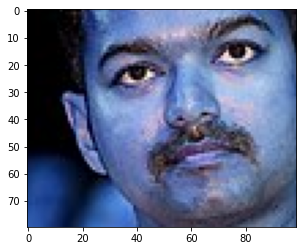

In [24]:
plt.imshow(b[80: 160, 61: 160])

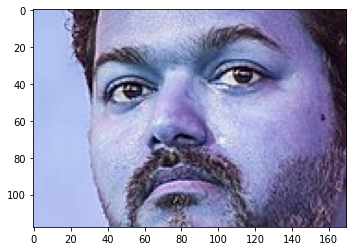

In [25]:
plt.imshow(a[106: 224, 78: 248])

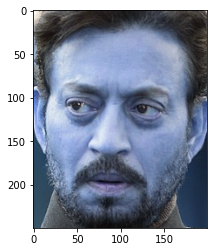

In [47]:
plt.imshow(c[50:300, 300: 500])

In [68]:
a = cv2.cvtColor(a[106: 224, 78: 248], cv2.COLOR_BGR2GRAY)
b = cv2.cvtColor(b[80: 160, 61: 160], cv2.COLOR_BGR2GRAY)
c = cv2.cvtColor(c[50:300, 300: 500], cv2.COLOR_BGR2GRAY)

In [69]:
a = cv2.resize(a, (100, 100)).reshape(1, 100, 100, 1)
b = cv2.resize(b, (100, 100)).reshape(1, 100, 100, 1)
c = cv2.resize(c, (100, 100)).reshape(1, 100, 100, 1)

# Passed Same Person Images

In [70]:
model.predict((a, b))

array([[1.]], dtype=float32)

# Passed 2 Different person images

In [71]:
model.predict((a, c))

array([[0.]], dtype=float32)

# Passed 2 Different person images

In [72]:
model.predict((b, c))

array([[0.]], dtype=float32)

In [76]:
d = cv2.imread("image2.jpg")

In [77]:
coords = detect_faces(d.copy(), drawFace=False, returnCoords=True, confidence=0.4)
print(coords)

[[104, 76, 220, 225]]


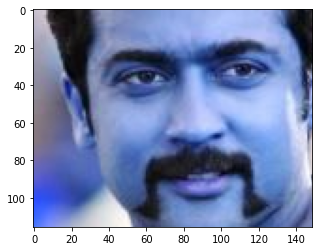

In [78]:
plt.imshow(d[104: 220, 76: 225])

In [79]:
d = cv2.cvtColor(d[104: 220, 76: 225], cv2.COLOR_BGR2GRAY)
d = cv2.resize(d, (100, 100)).reshape(1, 100, 100, 1)

In [80]:
model.predict((a, d))

array([[7.3325964e-28]], dtype=float32)

In [81]:
model.predict((b, d))

array([[0.]], dtype=float32)

In [82]:
model.predict((c, d))

array([[0.]], dtype=float32)

# Under Testing

In [ ]:
def get_siamese_model(input_shape):
    """
        Model architecture
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    left = Conv2D(64, (10,10), activation='relu')(left_input)
    left = BatchNormalization(axis=-1)(left)
    left = MaxPooling2D((2, 2))(left)

    left = Conv2D(128, (7,7), activation='relu')(left)
    left = BatchNormalization(axis=-1)(left)
    left = MaxPooling2D((2, 2))(left)

    left = Conv2D(128, (4,4), activation='relu')(left)
    left = BatchNormalization(axis=-1)(left)
    left = MaxPooling2D((2, 2))(left)

    left = Conv2D(128, (4,4), activation='relu')(left)

    left = Flatten()(left)

    left = Dense(4096, activation='sigmoid')(left)


    right = Conv2D(64, (10,10), activation='relu')(right_input)
    right = BatchNormalization(axis=-1)(right)
    right = MaxPooling2D((2, 2))(right)

    right = Conv2D(128, (7,7), activation='relu')(right)
    right = BatchNormalization(axis=-1)(right)
    right = MaxPooling2D((2, 2))(right)

    right = Conv2D(128, (4,4), activation='relu')(right)
    right = BatchNormalization(axis=-1)(right)
    right = MaxPooling2D((2, 2))(right)

    right = Conv2D(128, (4,4), activation='relu')(right)

    right = Flatten()(right)
    
    right = Dense(4096, activation='sigmoid')(right)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([left, right])

    #layers.Subtract()([x1, x2])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid')(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net


In [ ]:

assert False
epochs = 10000
learning_rate = 1e-2

optimizer = optimizers.Adam(learning_rate=learning_rate, decay=learning_rate / epochs)
loss_fn = losses.BinaryCrossentropy()
train_acc_metric = tf.keras.metrics.BinaryCrossentropy()
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value

for epoch in range(epochs):

	a, b, c = dl.load()
	for step, (x1, x2, y) in enumerate(zip(a, b, c)):
		loss_value = train_step([x1, x2], y)
		if step % 10 == 0:
			print("Step {}, Loss {}".format(step, float(loss_value)))
	del a, b, c
	train_acc = train_acc_metric.result()
	print("Training acc {} over epoch: {}".format(train_acc, epoch+1))
	train_acc_metric.reset_states()